In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
df = pd.read_csv(r"C:\Users\USER\Documents\DS12\my_project\cilmate\Muriae_Clean.csv")

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,x
0,1,Muriae,29/08/2006,NaN,990.700000,10.800000,19.7,NaN,NaN,57.000000,NaN,NaN,3.0000,NaN
1,2,Muriae,30/08/2006,NaN,988.975000,10.658333,23.0,NaN,NaN,56.666667,46.0,10.0,4.6000,NaN
2,3,Muriae,31/08/2006,1.0,987.662500,9.633333,25.1,17.987500,10.8,61.458333,35.0,10.5,2.7500,NaN
3,4,Muriae,01/09/2006,0.0,982.525000,11.362500,27.9,19.250000,11.6,63.208333,37.0,10.0,1.2125,NaN
4,5,Muriae,02/09/2006,0.0,977.670833,14.670833,23.7,19.629167,16.2,73.750000,55.0,11.7,1.6375,NaN


In [4]:
df.describe(include = "all")

,Unnamed: 0,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,x
count,4874.000000,4874,4874,4574.000000,4665.000000,4643.000000,4770.000000,4604.000000,4764.000000,4696.000000,4769.000000,4769.000000,4665.000000,0.0
unique,NaN,1,4874,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Muriae,23/12/2014,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,4874,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2437.500000,NaN,NaN,4.255400,982.260289,17.727698,29.629078,23.099911,18.709131,74.304581,47.645209,8.638960,1.273137,NaN
std,1407.146936,NaN,NaN,11.814603,4.069680,2.954191,4.000298,2.882440,2.990501,9.560479,13.934694,3.197525,0.699479,NaN
min,1.000000,NaN,NaN,0.000000,969.533333,7.570833,18.000000,14.608333,8.400000,33.166667,9.000000,0.000000,0.000000,NaN
25%,1219.250000,NaN,NaN,0.000000,979.370833,15.550000,26.900000,20.904303,16.500000,68.083333,38.000000,6.200000,0.777273,NaN
50%,2437.500000,NaN,NaN,0.000000,981.870833,18.308333,29.800000,23.120833,19.300000,74.666667,46.000000,8.200000,1.112500,NaN
75%,3655.750000,NaN,NaN,1.200000,984.958333,20.166667,32.700000,25.366667,21.100000,81.083333,56.000000,10.500000,1.592857,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4874 entries, 0 to 4873
Data columns (total 14 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  4874 non-null   int64  
 1   city                                        4874 non-null   object 
 2   medication_date                             4874 non-null   object 
 3   total_daily_rainfall_aut_mm                 4574 non-null   float64
 4   daily_average_atmospheric_pressure_aut_m_b  4665 non-null   float64
 5   average_daily_dew_point_temp_c              4643 non-null   float64
 6   max_daily_temp_c                            4770 non-null   float64
 7   average_daily_temp_c                        4604 non-null   float64
 8   min_daily_temp_c                            4764 non-null   float64
 9   average_daily_air_relative_humidity_aut     4696 non-null   float64
 10  minimum_dail

In [6]:
df.drop(columns=['Unnamed: 0', 'x'], inplace = True)

In [7]:
#import sweetviz as sv
#report = sv.analyze(df)
#report.show_html('Muriae_report.html')

In [8]:
corrMatrix = df.corr(method = 'spearman')
corrMatrix.style.background_gradient(cmap='coolwarm')

,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms
total_daily_rainfall_aut_mm,1.000000,-0.224049,0.403976,-0.272115,-0.080327,0.241135,0.623831,0.554642,0.112259,0.074343
daily_average_atmospheric_pressure_aut_m_b,-0.224049,1.000000,-0.685742,-0.569867,-0.709127,-0.679234,-0.037144,0.016352,-0.226574,-0.057954
average_daily_dew_point_temp_c,0.403976,-0.685742,1.000000,0.364420,0.650816,0.893146,0.448598,0.387515,0.152325,-0.026101
max_daily_temp_c,-0.272115,-0.569867,0.364420,1.000000,0.896645,0.502886,-0.572075,-0.662197,0.195252,0.002402
average_daily_temp_c,-0.080327,-0.709127,0.650816,0.896645,1.000000,0.794846,-0.334633,-0.360495,0.250714,0.077584
min_daily_temp_c,0.241135,-0.679234,0.893146,0.502886,0.794846,1.000000,0.153895,0.155661,0.270793,0.118836
average_daily_air_relative_humidity_aut,0.623831,-0.037144,0.448598,-0.572075,-0.334633,0.153895,1.000000,0.910631,-0.092211,-0.126744
minimum_daily_air_humidity_aut,0.554642,0.016352,0.387515,-0.662197,-0.360495,0.155661,0.910631,1.000000,-0.080398,-0.028579
wind_max_daily_gust_ms,0.112259,-0.226574,0.152325,0.195252,0.250714,0.270793,-0.092211,-0.080398,1.000000,0.689804
wind_average_daily_speed_ms,0.074343,-0.057954,-0.026101,0.002402,0.077584,0.118836,-0.126744,-0.028579,0.689804,1.000000


#### Turn "medication_date" to Date

In [9]:
df['Date'] = df["medication_date"]
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, infer_datetime_format=True)
df['year'] = df['Date'].dt.year
df["month"] = df['Date'].dt.month
df['week'] = df['Date'].dt.isocalendar().week
df.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
4864,Muriae,23/12/2019,18.6,979.891667,21.725000,29.5,24.175000,20.8,86.708333,65.0,6.8,0.683333,2019-12-23,2019,12,52
4865,Muriae,24/12/2019,18.8,980.800000,20.162500,24.9,21.720833,19.2,91.000000,74.0,10.0,0.770833,2019-12-24,2019,12,52
4866,Muriae,25/12/2019,14.6,980.700000,20.300000,32.5,25.145833,20.4,76.750000,49.0,9.6,0.762500,2019-12-25,2019,12,52
4867,Muriae,26/12/2019,0.0,981.495833,20.545833,32.6,25.800000,21.2,75.208333,40.0,10.6,0.783333,2019-12-26,2019,12,52
4868,Muriae,27/12/2019,0.0,982.404167,20.270833,32.7,26.170833,21.7,72.500000,43.0,8.7,0.920833,2019-12-27,2019,12,52
4869,Muriae,28/12/2019,0.0,981.887500,20.037500,32.6,25.933333,22.0,71.958333,42.0,7.8,0.912500,2019-12-28,2019,12,52
4870,Muriae,29/12/2019,0.0,980.633333,18.983333,32.0,25.412500,20.1,70.416667,38.0,8.4,1.041667,2019-12-29,2019,12,52
4871,Muriae,30/12/2019,0.0,978.529167,18.741667,32.8,25.566667,20.2,68.791667,38.0,7.7,0.587500,2019-12-30,2019,12,1
4872,Muriae,31/12/2019,0.0,977.866667,19.437500,32.9,25.566667,20.1,71.708333,41.0,6.3,0.541667,2019-12-31,2019,12,1
4873,Muriae,01/01/2020,0.0,975.925000,20.070833,34.5,26.812500,20.5,69.541667,41.0,4.8,0.466667,2020-01-01,2020,1,1


### Testing for Outliers

In [10]:
col_names = list(df.columns)
col_names

['city',
 'medication_date',
 'total_daily_rainfall_aut_mm',
 'daily_average_atmospheric_pressure_aut_m_b',
 'average_daily_dew_point_temp_c',
 'max_daily_temp_c',
 'average_daily_temp_c',
 'min_daily_temp_c',
 'average_daily_air_relative_humidity_aut',
 'minimum_daily_air_humidity_aut',
 'wind_max_daily_gust_ms',
 'wind_average_daily_speed_ms',
 'Date',
 'year',
 'month',
 'week']

<AxesSubplot:xlabel='wind_average_daily_speed_ms'>

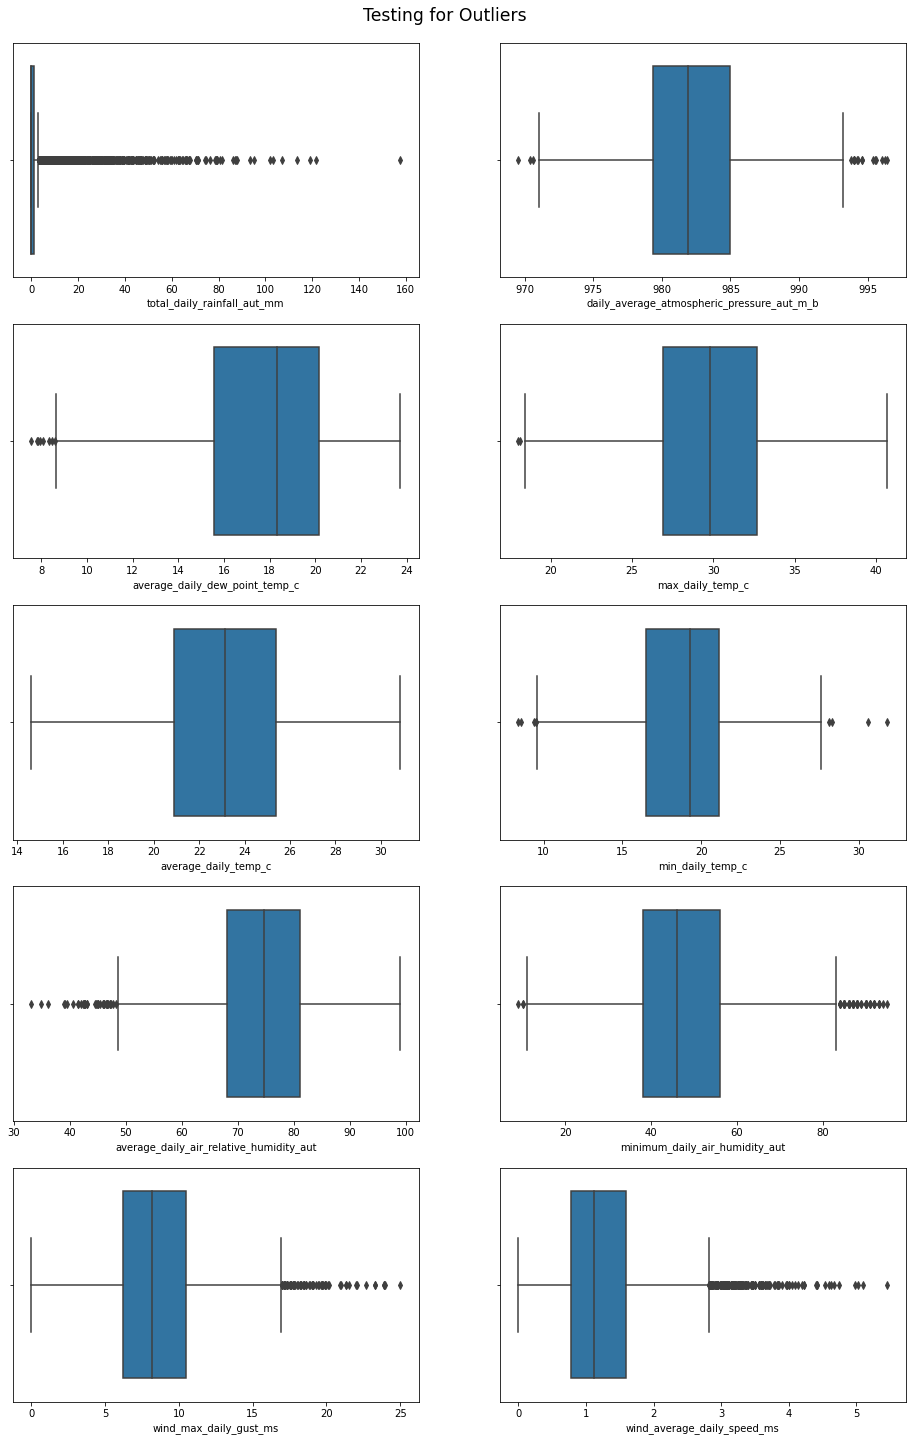

In [11]:
fig, axes = plt.subplots(5,2, figsize=(16,25))
fig.suptitle('Testing for Outliers', y= 0.9, fontsize =  'xx-large')
sns.boxplot(ax=axes[0, 0], x='total_daily_rainfall_aut_mm', data = df)
sns.boxplot(ax=axes[0, 1], x='daily_average_atmospheric_pressure_aut_m_b', data = df)
sns.boxplot(ax=axes[1, 0], x='average_daily_dew_point_temp_c', data = df)
sns.boxplot(ax=axes[1, 1], x='max_daily_temp_c', data = df)
sns.boxplot(ax=axes[2, 0], x='average_daily_temp_c', data = df)
sns.boxplot(ax=axes[2, 1], x='min_daily_temp_c', data = df)
sns.boxplot(ax=axes[3, 0], x='average_daily_air_relative_humidity_aut', data = df)
sns.boxplot(ax=axes[3, 1], x='minimum_daily_air_humidity_aut', data = df)
sns.boxplot(ax=axes[4, 0], x='wind_max_daily_gust_ms',  data = df)
sns.boxplot(ax=axes[4, 1], x='wind_average_daily_speed_ms', data = df)

<AxesSubplot:xlabel='year', ylabel='total_daily_rainfall_aut_mm'>

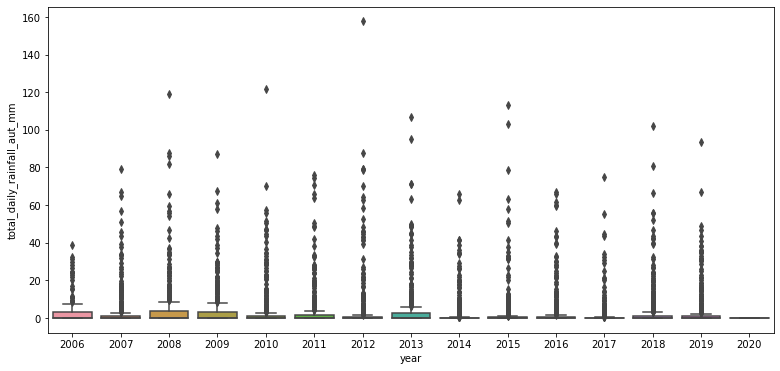

In [12]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='total_daily_rainfall_aut_mm', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='min_daily_temp_c'>

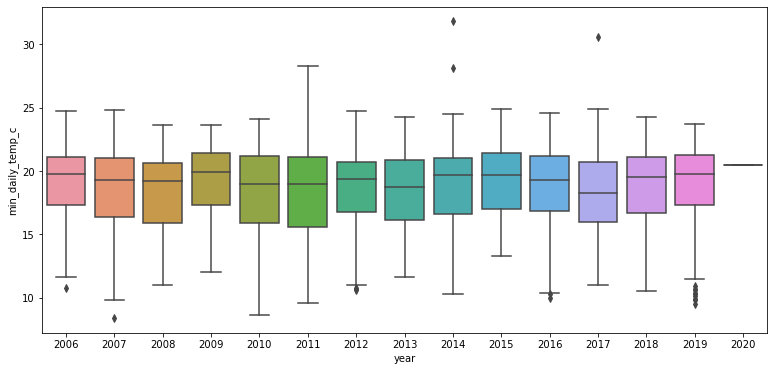

In [13]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='min_daily_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='max_daily_temp_c'>

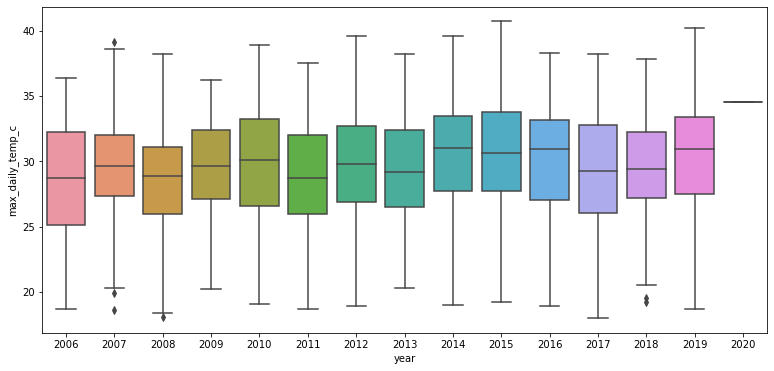

In [14]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='max_daily_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='average_daily_dew_point_temp_c'>

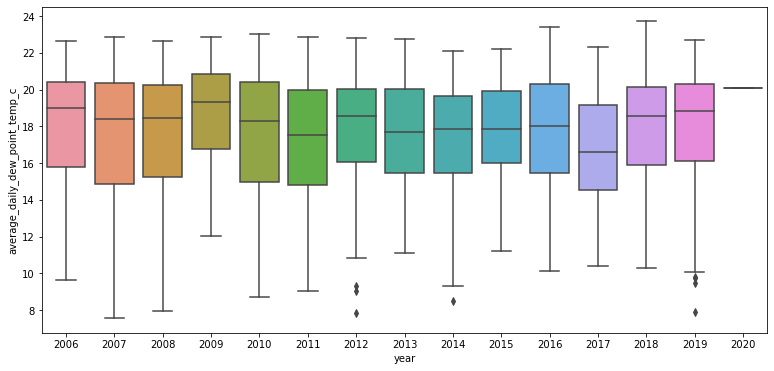

In [15]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='average_daily_dew_point_temp_c', x= 'year', data = df)

<AxesSubplot:xlabel='year', ylabel='wind_average_daily_speed_ms'>

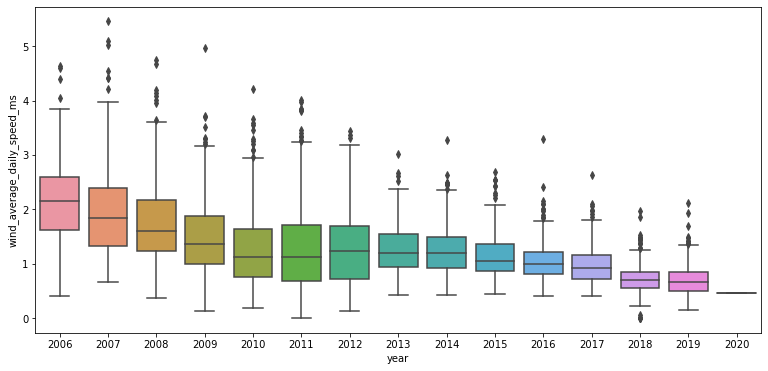

In [16]:
plt.figure(figsize=(13, 6))
sns.boxplot(y='wind_average_daily_speed_ms', x= 'year', data = df)

### Missing values

In [17]:
df.isnull().sum()

city                                            0
medication_date                                 0
total_daily_rainfall_aut_mm                   300
daily_average_atmospheric_pressure_aut_m_b    209
average_daily_dew_point_temp_c                231
max_daily_temp_c                              104
average_daily_temp_c                          270
min_daily_temp_c                              110
average_daily_air_relative_humidity_aut       178
minimum_daily_air_humidity_aut                105
wind_max_daily_gust_ms                        105
wind_average_daily_speed_ms                   209
Date                                            0
year                                            0
month                                           0
week                                            0
dtype: int64

Nulls range 2.1% - 6.15%

In [18]:
df_nulls = df.copy()

#set date as index
df_nulls = df_nulls.set_index('Date')

columns = list(df_nulls.columns)

for col in columns:
    new_col_name = col+"_nulls"
    df_nulls[new_col_name] = 0
    df_nulls.loc[(df_nulls[col].isnull()),[new_col_name]] = 1

df_nulls2 = df_nulls.copy()   

df_nulls.drop(columns=columns, inplace=True)

    
df_nulls.head()

,city_nulls,medication_date_nulls,total_daily_rainfall_aut_mm_nulls,daily_average_atmospheric_pressure_aut_m_b_nulls,average_daily_dew_point_temp_c_nulls,max_daily_temp_c_nulls,average_daily_temp_c_nulls,min_daily_temp_c_nulls,average_daily_air_relative_humidity_aut_nulls,minimum_daily_air_humidity_aut_nulls,wind_max_daily_gust_ms_nulls,wind_average_daily_speed_ms_nulls,year_nulls,month_nulls,week_nulls
Date,,,,,,,,,,,,,,,
2006-08-29,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0
2006-08-30,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0
2006-08-31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2006-09-01,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2006-09-02,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:ylabel='Date'>

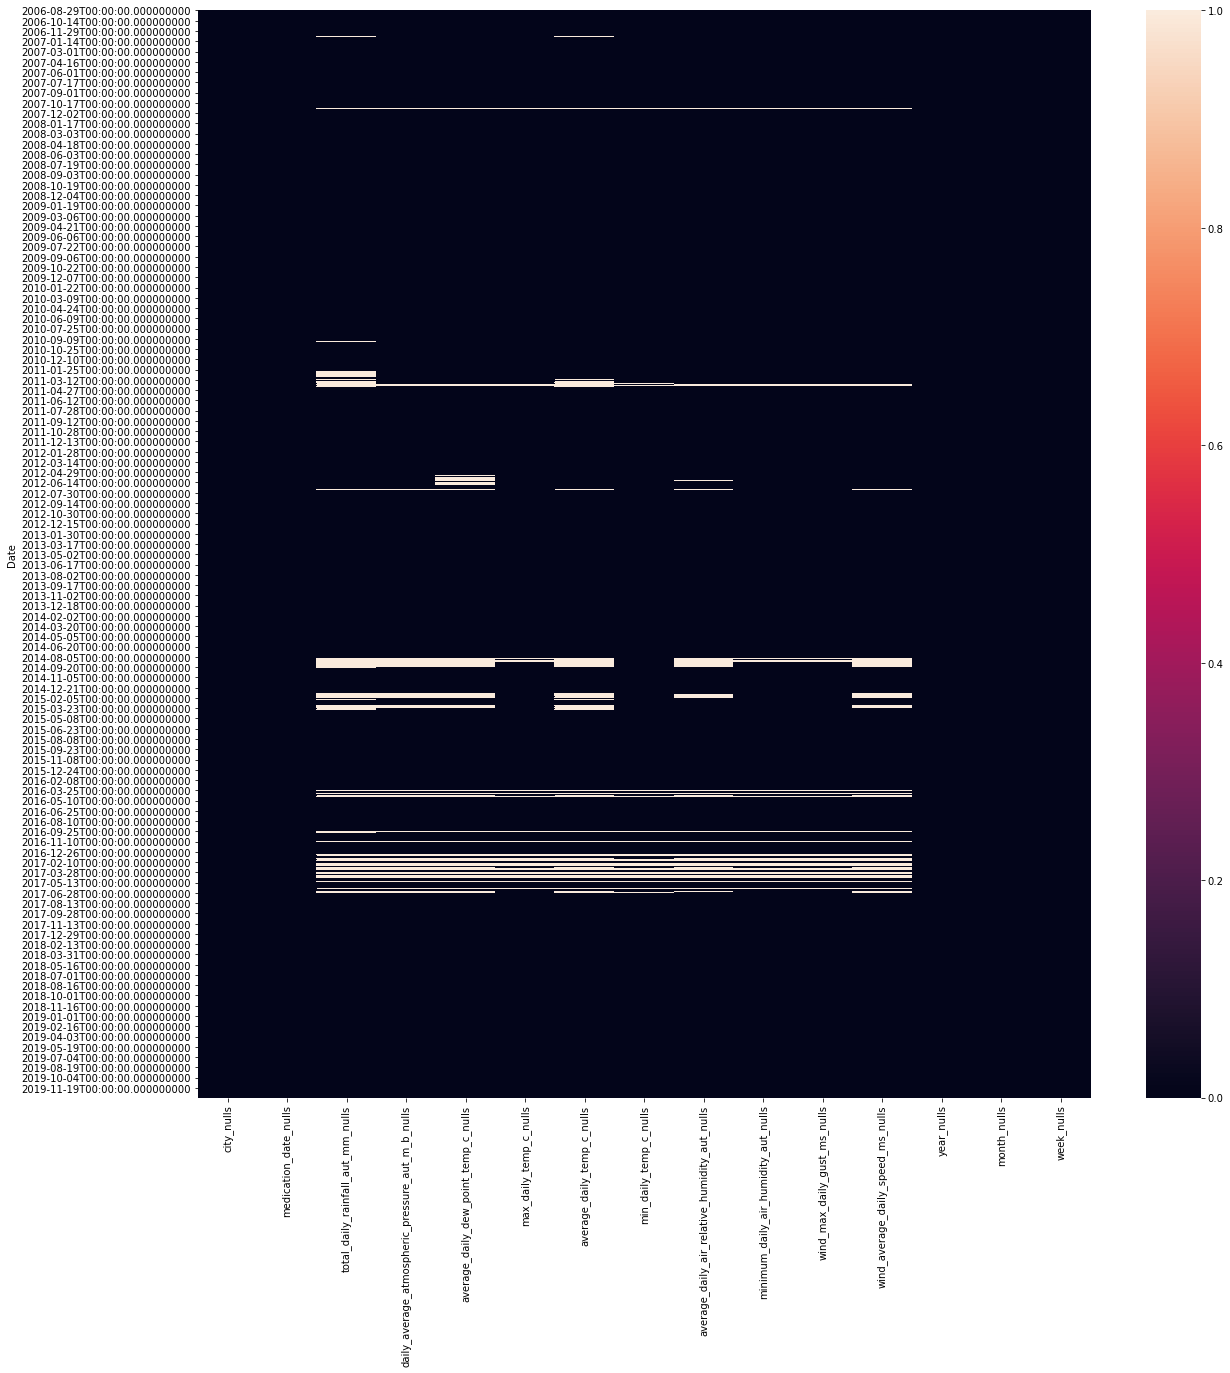

In [19]:
plt.figure(figsize=(20,20))
sns.heatmap(df_nulls)

In [20]:
df_copy2 = df.copy()

for col in df.columns:
    new_col_name = col+"_nulls"
    df_copy2[new_col_name] = 0
    df_copy2.loc[(df_copy2[col].isnull()),[new_col_name]] = 1
    
df_copy2.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,city_nulls,medication_date_nulls,total_daily_rainfall_aut_mm_nulls,daily_average_atmospheric_pressure_aut_m_b_nulls,average_daily_dew_point_temp_c_nulls,max_daily_temp_c_nulls,average_daily_temp_c_nulls,min_daily_temp_c_nulls,average_daily_air_relative_humidity_aut_nulls,minimum_daily_air_humidity_aut_nulls,wind_max_daily_gust_ms_nulls,wind_average_daily_speed_ms_nulls,Date_nulls,year_nulls,month_nulls,week_nulls
0,Muriae,29/08/2006,NaN,990.700000,10.800000,19.7,NaN,NaN,57.000000,NaN,NaN,3.0000,2006-08-29,2006,8,35,0,0,1,0,0,0,1,1,0,1,1,0,0,0,0,0
1,Muriae,30/08/2006,NaN,988.975000,10.658333,23.0,NaN,NaN,56.666667,46.0,10.0,4.6000,2006-08-30,2006,8,35,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0
2,Muriae,31/08/2006,1.0,987.662500,9.633333,25.1,17.987500,10.8,61.458333,35.0,10.5,2.7500,2006-08-31,2006,8,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Muriae,01/09/2006,0.0,982.525000,11.362500,27.9,19.250000,11.6,63.208333,37.0,10.0,1.2125,2006-09-01,2006,9,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Muriae,02/09/2006,0.0,977.670833,14.670833,23.7,19.629167,16.2,73.750000,55.0,11.7,1.6375,2006-09-02,2006,9,35,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


(array([679., 344., 343., 393., 377., 402., 378., 391., 428., 839.]),
 array([ 1. ,  2.1,  3.2,  4.3,  5.4,  6.5,  7.6,  8.7,  9.8, 10.9, 12. ]),
 <BarContainer object of 10 artists>)

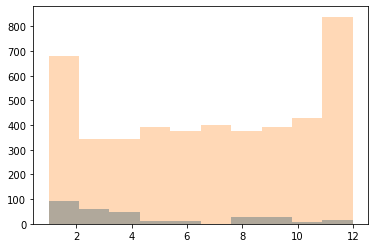

In [21]:
# test if rain nulls are dont random in relation to the month

x1 = df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==1, 'month']
x0 =df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==0, 'month']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([  13.,   55.,  156.,  388.,  635.,  656.,  792., 1151.,  674.,
          54.]),
 array([ 8.4 , 10.05, 11.7 , 13.35, 15.  , 16.65, 18.3 , 19.95, 21.6 ,
        23.25, 24.9 ]),
 <BarContainer object of 10 artists>)

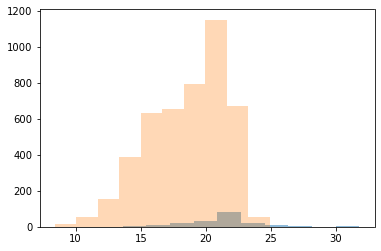

In [22]:
# test if rain nulls are dont random in relation to the min temp

x1 = df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==1, 'min_daily_temp_c']
x0 =df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==0, 'min_daily_temp_c']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([ 39., 178., 405., 636., 920., 856., 883., 499., 139.,  19.]),
 array([18.1 , 20.36, 22.62, 24.88, 27.14, 29.4 , 31.66, 33.92, 36.18,
        38.44, 40.7 ]),
 <BarContainer object of 10 artists>)

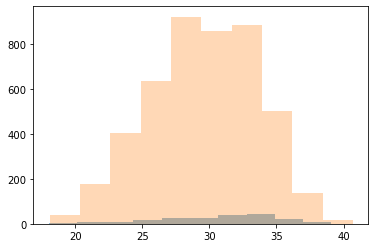

In [23]:
# test if rain nulls are dont random in relation to the max temp

x1 = df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==1, 'max_daily_temp_c']
x0 =df_copy2.loc[df_copy2['total_daily_rainfall_aut_mm_nulls']==0, 'max_daily_temp_c']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

(array([  22.,  144.,  657.,  955., 1196.,  791.,  534.,  224.,  100.,
          40.]),
 array([ 9. , 17.5, 26. , 34.5, 43. , 51.5, 60. , 68.5, 77. , 85.5, 94. ]),
 <BarContainer object of 10 artists>)

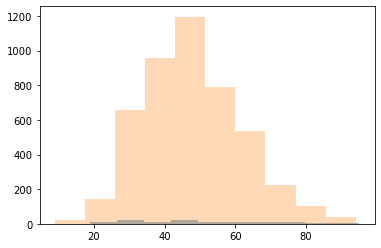

In [24]:
# test if pressure nulls are dont random in relation to the min humidity

x1 = df_copy2.loc[df_copy2['daily_average_atmospheric_pressure_aut_m_b_nulls']==1, 'minimum_daily_air_humidity_aut']
x0 =df_copy2.loc[df_copy2['daily_average_atmospheric_pressure_aut_m_b_nulls']==0, 'minimum_daily_air_humidity_aut']
plt.hist(x1,alpha=0.5)
plt.hist(x0,alpha=0.3)

Missing Mechanism appears to be MCAR, (probably due to equipment malfunction)

-----------------------------
### Missing values treatment:
1. Use 'ffill' and 'bfill' in for when 1-2 rows missing
2. Drop rows where all climate data is missing
3. Use KNN to fill the remaining nulls

In [25]:
col_list = ['total_daily_rainfall_aut_mm',
       'daily_average_atmospheric_pressure_aut_m_b',
       'average_daily_dew_point_temp_c', 'max_daily_temp_c',
       'average_daily_temp_c', 'min_daily_temp_c',
       'average_daily_air_relative_humidity_aut',
       'minimum_daily_air_humidity_aut', 'wind_max_daily_gust_ms',
       'wind_average_daily_speed_ms']

In [26]:
df_clean = df.copy()

# fillna for single rows
df_clean.fillna(method = 'ffill', limit = 1, inplace = True)
df_clean.fillna(method = 'bfill', limit = 1, inplace = True)
df_clean.isnull().sum()

city                                            0
medication_date                                 0
total_daily_rainfall_aut_mm                   234
daily_average_atmospheric_pressure_aut_m_b    160
average_daily_dew_point_temp_c                162
max_daily_temp_c                               61
average_daily_temp_c                          206
min_daily_temp_c                               66
average_daily_air_relative_humidity_aut       132
minimum_daily_air_humidity_aut                 61
wind_max_daily_gust_ms                         61
wind_average_daily_speed_ms                   160
Date                                            0
year                                            0
month                                           0
week                                            0
dtype: int64

In [27]:
#drop rows

df_clean.dropna(how= 'all', subset = col_list, inplace = True)
df_clean.isnull().sum()

city                                            0
medication_date                                 0
total_daily_rainfall_aut_mm                   177
daily_average_atmospheric_pressure_aut_m_b    103
average_daily_dew_point_temp_c                105
max_daily_temp_c                                4
average_daily_temp_c                          149
min_daily_temp_c                                9
average_daily_air_relative_humidity_aut        75
minimum_daily_air_humidity_aut                  4
wind_max_daily_gust_ms                          4
wind_average_daily_speed_ms                   103
Date                                            0
year                                            0
month                                           0
week                                            0
dtype: int64

<AxesSubplot:>

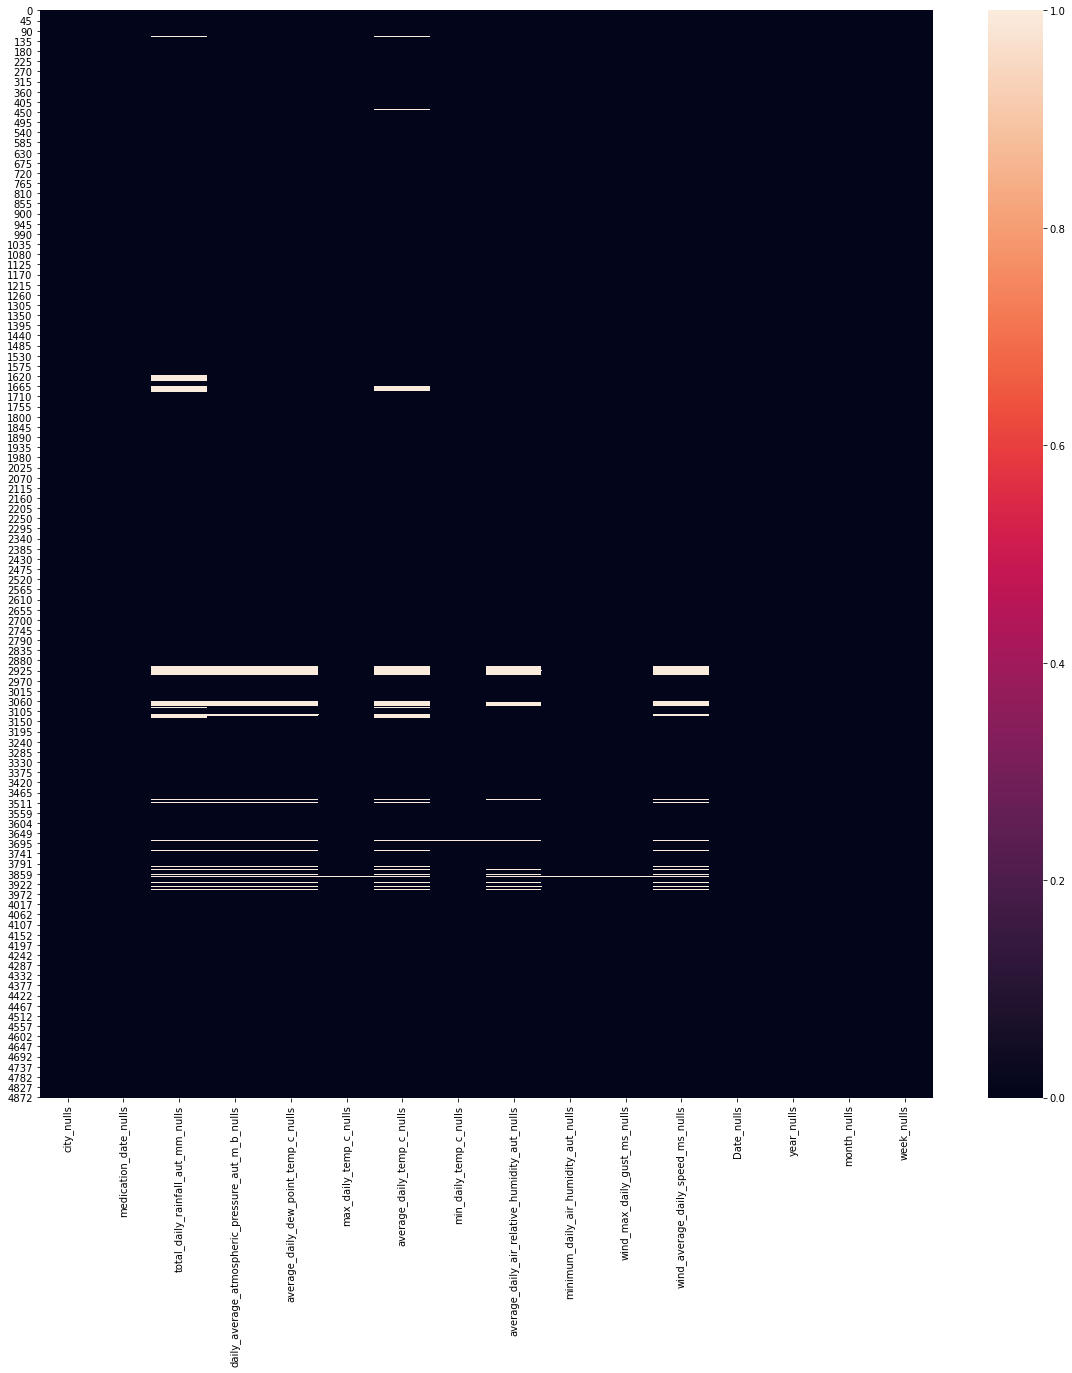

In [28]:
columns = list(df_clean.columns)
df_copy2 = df_clean.copy()

for col in df.columns:
    new_col_name = col+"_nulls"
    df_copy2[new_col_name] = 0
    df_copy2.loc[(df_copy2[col].isnull()),[new_col_name]] = 1
    
df_copy2.drop(columns=columns, inplace=True)
    
plt.figure(figsize=(20,20))
sns.heatmap(df_copy2)

<AxesSubplot:>

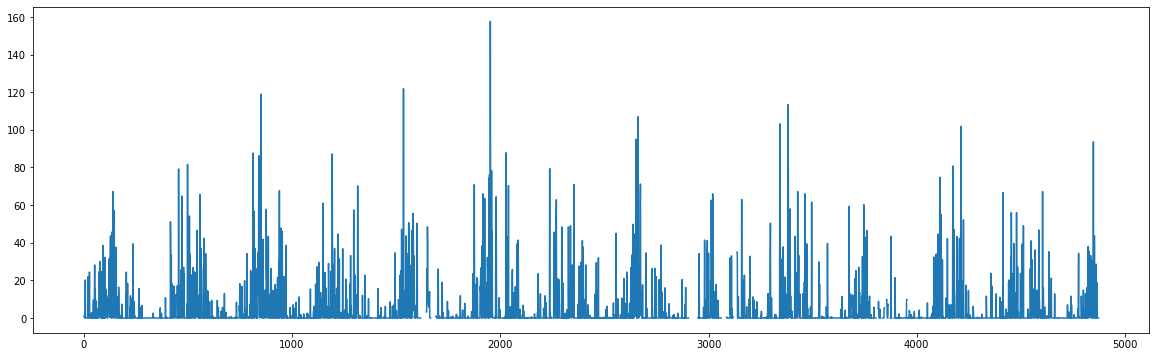

In [29]:
df_clean['total_daily_rainfall_aut_mm'].plot(figsize=(20,6))

<AxesSubplot:>

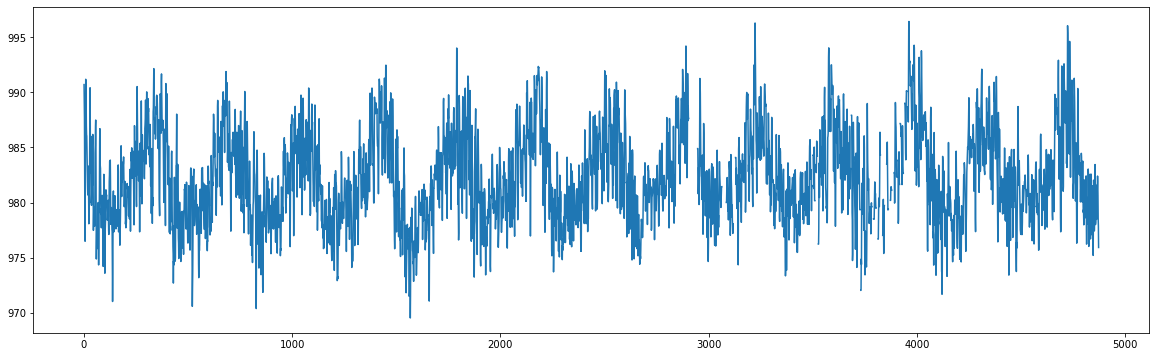

In [30]:
df_clean['daily_average_atmospheric_pressure_aut_m_b'].plot(figsize=(20,6))

In [31]:
imputer = KNNImputer(copy = False)
df_clean[col_list] = imputer.fit_transform(df_clean[col_list])


df_clean.isnull().sum()

city                                          0
medication_date                               0
total_daily_rainfall_aut_mm                   0
daily_average_atmospheric_pressure_aut_m_b    0
average_daily_dew_point_temp_c                0
max_daily_temp_c                              0
average_daily_temp_c                          0
min_daily_temp_c                              0
average_daily_air_relative_humidity_aut       0
minimum_daily_air_humidity_aut                0
wind_max_daily_gust_ms                        0
wind_average_daily_speed_ms                   0
Date                                          0
year                                          0
month                                         0
week                                          0
dtype: int64

<AxesSubplot:>

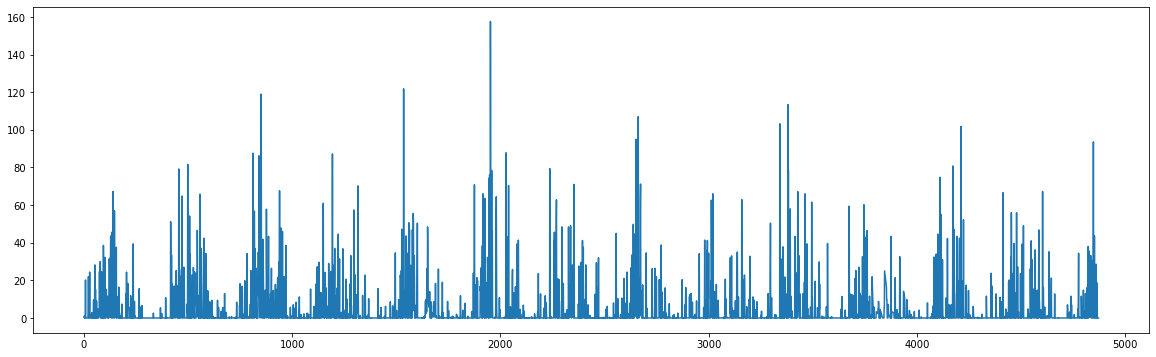

In [32]:
df_clean['total_daily_rainfall_aut_mm'].plot(figsize=(20,6))

<AxesSubplot:>

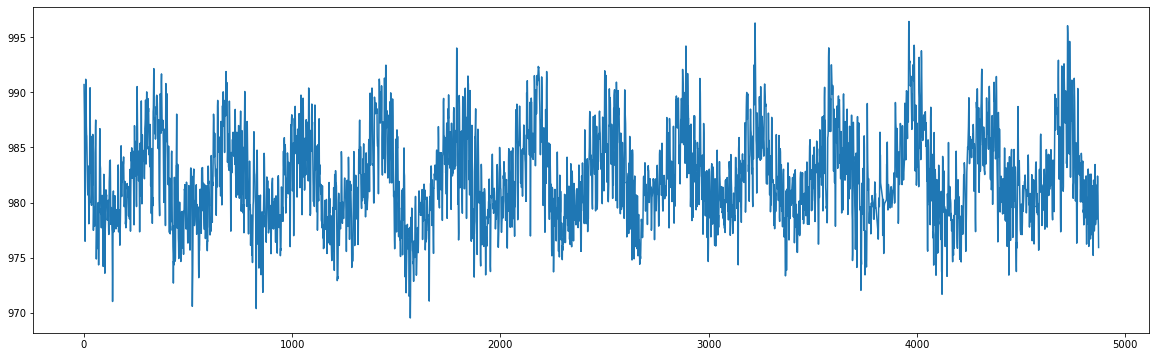

In [33]:
df_clean['daily_average_atmospheric_pressure_aut_m_b'].plot(figsize=(20,6))

Keep only rows with relevent dates. i.e. drop all rows with year < 2012

In [34]:
df_clean.drop(df_clean[df_clean['year'] < 2012].index, inplace = True)
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2866 entries, 1951 to 4873
Data columns (total 16 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   city                                        2866 non-null   object        
 1   medication_date                             2866 non-null   object        
 2   total_daily_rainfall_aut_mm                 2866 non-null   float64       
 3   daily_average_atmospheric_pressure_aut_m_b  2866 non-null   float64       
 4   average_daily_dew_point_temp_c              2866 non-null   float64       
 5   max_daily_temp_c                            2866 non-null   float64       
 6   average_daily_temp_c                        2866 non-null   float64       
 7   min_daily_temp_c                            2866 non-null   float64       
 8   average_daily_air_relative_humidity_aut     2866 non-null   float64       
 9   minim

In [35]:
#fix problem of the number of last week of the year 

df_clean.loc[(df_clean['week'] == 1) & (df_clean['month'] == 12), 'year'] = df_clean['year'] +1
df_clean.loc[(df_clean['week'] >= 52) & (df_clean['month'] == 1), 'year'] = df_clean['year'] -1
df_clean.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
4864,Muriae,23/12/2019,18.6,979.891667,21.725000,29.5,24.175000,20.8,86.708333,65.0,6.8,0.683333,2019-12-23,2019,12,52
4865,Muriae,24/12/2019,18.8,980.800000,20.162500,24.9,21.720833,19.2,91.000000,74.0,10.0,0.770833,2019-12-24,2019,12,52
4866,Muriae,25/12/2019,14.6,980.700000,20.300000,32.5,25.145833,20.4,76.750000,49.0,9.6,0.762500,2019-12-25,2019,12,52
4867,Muriae,26/12/2019,0.0,981.495833,20.545833,32.6,25.800000,21.2,75.208333,40.0,10.6,0.783333,2019-12-26,2019,12,52
4868,Muriae,27/12/2019,0.0,982.404167,20.270833,32.7,26.170833,21.7,72.500000,43.0,8.7,0.920833,2019-12-27,2019,12,52
4869,Muriae,28/12/2019,0.0,981.887500,20.037500,32.6,25.933333,22.0,71.958333,42.0,7.8,0.912500,2019-12-28,2019,12,52
4870,Muriae,29/12/2019,0.0,980.633333,18.983333,32.0,25.412500,20.1,70.416667,38.0,8.4,1.041667,2019-12-29,2019,12,52
4871,Muriae,30/12/2019,0.0,978.529167,18.741667,32.8,25.566667,20.2,68.791667,38.0,7.7,0.587500,2019-12-30,2020,12,1
4872,Muriae,31/12/2019,0.0,977.866667,19.437500,32.9,25.566667,20.1,71.708333,41.0,6.3,0.541667,2019-12-31,2020,12,1
4873,Muriae,01/01/2020,0.0,975.925000,20.070833,34.5,26.812500,20.5,69.541667,41.0,4.8,0.466667,2020-01-01,2020,1,1


In [36]:
df_clean.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week
1951,Muriae,01/01/2012,21.8,974.245833,22.795833,27.0,23.712500,22.0,94.750000,81.0,8.9,0.862500,2012-01-01,2011,1,52
1952,Muriae,02/01/2012,157.6,973.745833,20.891667,24.2,21.112500,20.6,98.625000,93.0,10.0,1.125000,2012-01-02,2012,1,1
1953,Muriae,03/01/2012,79.0,976.695833,20.575000,26.3,21.825000,19.8,92.916667,75.0,9.4,1.400000,2012-01-03,2012,1,1
1954,Muriae,04/01/2012,1.8,979.341667,19.770833,29.2,23.025000,19.7,82.791667,59.0,7.8,1.333333,2012-01-04,2012,1,1
1955,Muriae,05/01/2012,44.8,980.625000,19.075000,29.8,22.429167,18.1,83.125000,55.0,17.5,1.491667,2012-01-05,2012,1,1


In [37]:
# make column of 'week of the year' in format yyyyww

df_clean['week'] = df_clean['week'].astype('str').str.pad(width=2, side='left', fillchar='0')
df_clean["weekofyear"] = df_clean['year'].astype('str') + df_clean['week'].astype('str')
df_clean.tail(10)

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,weekofyear
4864,Muriae,23/12/2019,18.6,979.891667,21.725000,29.5,24.175000,20.8,86.708333,65.0,6.8,0.683333,2019-12-23,2019,12,52,201952
4865,Muriae,24/12/2019,18.8,980.800000,20.162500,24.9,21.720833,19.2,91.000000,74.0,10.0,0.770833,2019-12-24,2019,12,52,201952
4866,Muriae,25/12/2019,14.6,980.700000,20.300000,32.5,25.145833,20.4,76.750000,49.0,9.6,0.762500,2019-12-25,2019,12,52,201952
4867,Muriae,26/12/2019,0.0,981.495833,20.545833,32.6,25.800000,21.2,75.208333,40.0,10.6,0.783333,2019-12-26,2019,12,52,201952
4868,Muriae,27/12/2019,0.0,982.404167,20.270833,32.7,26.170833,21.7,72.500000,43.0,8.7,0.920833,2019-12-27,2019,12,52,201952
4869,Muriae,28/12/2019,0.0,981.887500,20.037500,32.6,25.933333,22.0,71.958333,42.0,7.8,0.912500,2019-12-28,2019,12,52,201952
4870,Muriae,29/12/2019,0.0,980.633333,18.983333,32.0,25.412500,20.1,70.416667,38.0,8.4,1.041667,2019-12-29,2019,12,52,201952
4871,Muriae,30/12/2019,0.0,978.529167,18.741667,32.8,25.566667,20.2,68.791667,38.0,7.7,0.587500,2019-12-30,2020,12,01,202001
4872,Muriae,31/12/2019,0.0,977.866667,19.437500,32.9,25.566667,20.1,71.708333,41.0,6.3,0.541667,2019-12-31,2020,12,01,202001
4873,Muriae,01/01/2020,0.0,975.925000,20.070833,34.5,26.812500,20.5,69.541667,41.0,4.8,0.466667,2020-01-01,2020,1,01,202001


In [38]:
df_clean.head()

,city,medication_date,total_daily_rainfall_aut_mm,daily_average_atmospheric_pressure_aut_m_b,average_daily_dew_point_temp_c,max_daily_temp_c,average_daily_temp_c,min_daily_temp_c,average_daily_air_relative_humidity_aut,minimum_daily_air_humidity_aut,wind_max_daily_gust_ms,wind_average_daily_speed_ms,Date,year,month,week,weekofyear
1951,Muriae,01/01/2012,21.8,974.245833,22.795833,27.0,23.712500,22.0,94.750000,81.0,8.9,0.862500,2012-01-01,2011,1,52,201152
1952,Muriae,02/01/2012,157.6,973.745833,20.891667,24.2,21.112500,20.6,98.625000,93.0,10.0,1.125000,2012-01-02,2012,1,01,201201
1953,Muriae,03/01/2012,79.0,976.695833,20.575000,26.3,21.825000,19.8,92.916667,75.0,9.4,1.400000,2012-01-03,2012,1,01,201201
1954,Muriae,04/01/2012,1.8,979.341667,19.770833,29.2,23.025000,19.7,82.791667,59.0,7.8,1.333333,2012-01-04,2012,1,01,201201
1955,Muriae,05/01/2012,44.8,980.625000,19.075000,29.8,22.429167,18.1,83.125000,55.0,17.5,1.491667,2012-01-05,2012,1,01,201201


In [26]:
df_clean.to_csv('Muriae_climate_KNN.csv', index=False)